In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
data = pd.read_csv("student_grades.csv")
data

,Student ID,Student Name,Grade1,Grade2,Grade3,Pass/Fail
0,ZPSQJ5D9,Sarah Johnson,51,92,14,1
1,7YT0S9OL,Alex Brown,71,60,20,1
2,1UU38VNV,John Brown,82,86,74,1
3,1L21O9NB,Chris Miller,74,87,99,1
4,HF9AJHMA,David Smith,23,2,21,0
...,...,...,...,...,...,...
95,8BFBMSJG,Katie Miller,22,30,93,0
96,8XM4ZY4Y,Katie Miller,41,98,6,0
97,TIA7NKFY,James Garcia,15,89,59,1
98,KSSM78WY,James Martinez,1,0,47,0


In [3]:
#check null values
data.columns[data.isna().any()]

Index([], dtype='object')

In [4]:
# dropping unwanted columns
x = data.iloc[:,2:-1].values # features
y = data.iloc[:,-1:].values # target
y = y.ravel()


In [5]:
#training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
#scale the data
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale  = sc.transform(x_test)

In [7]:
# Training the model
model = LogisticRegression()
model.fit(x_train_scale,y_train)

LogisticRegression()

In [8]:
# Prediction
y_pred = model.predict(x_test_scale)

In [9]:
#Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 95.00%


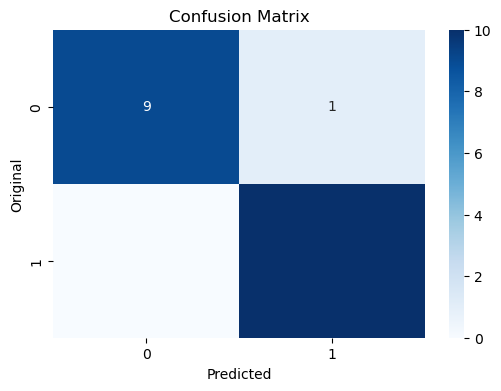

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Original')
plt.xlabel('Predicted')
plt.show()


In [14]:
#prediction from random grades
random_grades = np.random.randint(0, 101, size=(1, 3))  

# Scale the data
scaled_random_grades = sc.transform(random_grades)

# Predict 
prediction = model.predict(scaled_random_grades)
pass_fail = "Pass" if prediction[0] == 1 else "Fail"

# Display result
print(f"Random Grades: {random_grades[0]}")
print(f"Prediction: {pass_fail}")

Random Grades: [11 72 84]
Prediction: Pass
